# Data Prepration

## Set Up

In [1]:
import os
import pandas as pd 
import numpy as np
import os.path as path
import glob 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as  plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [3]:
def fill_odometer_value(odometer,range):
    print('odometer',odometer)
    print('range',range)
    odometer_new=odometer+range
    return odometer_new

## Data Preperation

In [35]:

def read_files():
    
    file_path=os.path.join(os.getcwd(), "data/raw/*.csv")
    print(file_path)
    all_files=glob.glob(file_path)
    print(len(all_files))
    final_df=pd.DataFrame()
    df=pd.DataFrame()
    filesnames_list=glob.glob(file_path)
    print(len(filesnames_list))
    #df=pd.concat((pd.read_csv(f, header=0) for f in filesnames_list), axis=0,ignore_index=True,join='inner',)
    final_df=pd.read_csv(all_files[0],header=0,parse_dates=False)
    for i in range(1,len(filesnames_list)):
        filename=all_files[i]
        df=pd.read_csv(filename,parse_dates=True)
    
        filname_split=filename.split('/')
        final_df= pd.concat([final_df,df],ignore_index=True,axis=0)
        final_df.drop(axis=0,labels=np.arange(13),inplace=True)
        final_df['user_id']=filname_split[-1].split(".")[0]
    return final_df

In [36]:
final_df=read_files()

/home/shosamane/FedTree/thesis/EV_Range_Pred/data/raw/*.csv
22
22


## Data Profiling

In [37]:
final_df.head()

,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,...,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id
13,Volkswagen,Golf,2018,e-Golf,100,14.01.2022,NaN,59.0,6.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
14,Volkswagen,Golf,2018,e-Golf,100,13.01.2022,NaN,59.0,23.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
15,Volkswagen,Golf,2018,e-Golf,100,13.01.2022,NaN,49.0,7.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
16,Volkswagen,Golf,2018,e-Golf,100,13.01.2022,NaN,71.0,4.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
17,Volkswagen,Golf,2018,e-Golf,100,12.01.2022,NaN,59.0,20.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015


In [38]:
final_df.shape

(31736, 22)

In [39]:
final_df.head(10)

,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,...,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id
13,Volkswagen,Golf,2018,e-Golf,100,14.01.2022,NaN,59.0,6.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
14,Volkswagen,Golf,2018,e-Golf,100,13.01.2022,NaN,59.0,23.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
15,Volkswagen,Golf,2018,e-Golf,100,13.01.2022,NaN,49.0,7.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
16,Volkswagen,Golf,2018,e-Golf,100,13.01.2022,NaN,71.0,4.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
17,Volkswagen,Golf,2018,e-Golf,100,12.01.2022,NaN,59.0,20.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
18,Volkswagen,Golf,2018,e-Golf,100,12.01.2022,NaN,58.0,10.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
19,Volkswagen,Golf,2018,e-Golf,100,12.01.2022,NaN,59.0,5.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
20,Volkswagen,Golf,2018,e-Golf,100,11.01.2022,NaN,59.0,18.4,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
21,Volkswagen,Golf,2018,e-Golf,100,11.01.2022,NaN,58.0,7.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
22,Volkswagen,Golf,2018,e-Golf,100,11.01.2022,NaN,146.0,6.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015


In [43]:
final_df.columns

Index(['manufacturer', 'model', 'year', 'version', 'power(kW)', 'fuel_date',
       'odometer', 'trip_distance(km)', 'quantity(kWh)', 'fuel_type',
       'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation', 'fuel_note', 'user_id'],
      dtype='object')

In [67]:
final_df[['trip_distance(km)', 'power(kW)','quantity(kWh)', 'fuel_type',
       'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation']].head(10)

,trip_distance(km),power(kW),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
13,59.0,100,6.0,Electricity,All-year tires,0,1,0,Normal,17.0,1,0,NaN,4.1
14,59.0,100,23.0,Electricity,All-year tires,0,1,0,Normal,17.0,1,0,NaN,4.1
15,49.0,100,7.0,Electricity,All-year tires,0,1,0,Normal,17.0,1,0,NaN,4.1
16,71.0,100,4.0,Electricity,All-year tires,0,1,0,Normal,17.0,1,0,NaN,4.1
17,59.0,100,20.0,Electricity,All-year tires,0,1,0,Normal,17.0,1,0,NaN,4.1
18,58.0,100,10.0,Electricity,All-year tires,0,1,0,Normal,17.0,1,0,NaN,4.1
19,59.0,100,5.0,Electricity,All-year tires,0,1,0,Normal,17.0,1,0,NaN,4.1
20,59.0,100,18.4,Electricity,All-year tires,0,1,0,Normal,17.0,1,0,NaN,4.1
21,58.0,100,7.0,Electricity,All-year tires,0,1,0,Normal,17.0,1,0,NaN,4.1
22,146.0,100,6.0,Electricity,All-year tires,0,1,0,Normal,17.0,1,0,NaN,4.1


In [57]:
print(final_df['fuel_type'].value_counts())

Electricity          30376
Green electricity     1325
Super gasoline          31
fuel_type                2
E10                      2
Name: fuel_type, dtype: int64


In [58]:
print(final_df['city'].value_counts())

1       20812
0        8718
0        1437
1         767
city        2
Name: city, dtype: int64


In [60]:
print(final_df['motor_way'].value_counts())

1            16240
0            13290
1             1618
0              586
motor_way        2
Name: motor_way, dtype: int64


In [78]:
final_df['city'].unique()

array(['0', 'city', '1', 1, 0], dtype=object)

In [61]:
print(final_df['driving_style'].value_counts())

Normal           20525
Moderate          9356
Fast              1742
driving_style        2
Name: driving_style, dtype: int64


In [65]:
final_df[['city', 'motor_way', 'country_roads']].head(30)

,city,motor_way,country_roads
13,0,1,0
14,0,1,0
15,0,1,0
16,0,1,0
17,0,1,0
18,0,1,0
19,0,1,0
20,0,1,0
21,0,1,0
22,0,1,0


In [66]:
final_df[['city', 'motor_way', 'country_roads']].tail(30)

,city,motor_way,country_roads
31719,0,1,0
31720,1,0,1
31721,0,1,1
31722,0,1,0
31723,1,1,0
31724,1,1,0
31725,1,1,1
31726,1,1,1
31727,1,1,1
31728,1,1,1


In [71]:
final_df[['power(kW)','quantity(kWh)']].tail(10)

,power(kW),quantity(kWh)
31739,278,47.0
31740,278,28.0
31741,278,35.0
31742,278,48.0
31743,278,10.0
31744,278,61.0
31745,278,25.0
31746,278,56.0
31747,278,7.0
31748,278,60.0


In [62]:
final_df.isna().sum()

manufacturer                  0
model                         0
year                          0
version                       0
power(kW)                     0
fuel_date                     0
odometer                   8282
trip_distance(km)             0
quantity(kWh)                 0
fuel_type                     0
tire_type                    90
city                          0
motor_way                     0
country_roads                 0
driving_style               111
consumption(kWh/100km)      100
A/C                           0
park_heating                  0
avg_speed(km/h)           26273
ecr_deviation              4161
fuel_note                 19715
user_id                       0
dtype: int64

In [72]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31736 entries, 13 to 31748
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   manufacturer            31736 non-null  object
 1   model                   31736 non-null  object
 2   year                    31736 non-null  object
 3   version                 31736 non-null  object
 4   power(kW)               31736 non-null  object
 5   fuel_date               31736 non-null  object
 6   odometer                23454 non-null  object
 7   trip_distance(km)       31736 non-null  object
 8   quantity(kWh)           31736 non-null  object
 9   fuel_type               31736 non-null  object
 10  tire_type               31646 non-null  object
 11  city                    31736 non-null  object
 12  motor_way               31736 non-null  object
 13  country_roads           31736 non-null  object
 14  driving_style           31625 non-null  object
 15  c

In [73]:
final_df.describe()

,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,...,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id
count,31736,31736,31736,31736,31736,31736,23454,31736.0,31736.0,31736,...,31736,31736,31625,31636.00,31736,31736,5463.0,27575.00,12021,31736
unique,9,9,11,15,14,3939,21775,2192.0,4040.0,5,...,5,5,4,2791.00,5,5,117.0,3095.00,9744,1
top,Mitsubishi,i-MiEV,2013,i-MiEV,85,06.12.2019,67397,42.0,6.0,Electricity,...,1,1,Normal,19.07,0,0,43.0,5.57,"0,1",Tesla_Model_S_2015
freq,7471,7471,4494,7471,5372,35,5,1457.0,246.0,30376,...,16240,17627,20525,222.00,24911,23694,232.0,215.00,247,31736


In [74]:
final_df.columns

Index(['manufacturer', 'model', 'year', 'version', 'power(kW)', 'fuel_date',
       'odometer', 'trip_distance(km)', 'quantity(kWh)', 'fuel_type',
       'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation', 'fuel_note', 'user_id'],
      dtype='object')

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31736 entries, 13 to 31748
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   manufacturer            31736 non-null  object 
 1   model                   31736 non-null  object 
 2   year                    31736 non-null  object 
 3   version                 31736 non-null  object 
 4   power(kW)               31734 non-null  float64
 5   fuel_date               31736 non-null  object 
 6   odometer                23452 non-null  float64
 7   trip_distance(km)       31734 non-null  float64
 8   quantity(kWh)           31734 non-null  float64
 9   fuel_type               31736 non-null  object 
 10  tire_type               31646 non-null  object 
 11  city                    31734 non-null  float64
 12  motor_way               31734 non-null  float64
 13  country_roads           31734 non-null  float64
 14  driving_style           31625 non-nul

### Converting Data types 

In [79]:
def convert_to_numeric(columns, df):
    for col in columns:
        df[col]=pd.to_numeric(df[col], errors='coerce')
        
colums_for_num_cov=['power(kW)','quantity(kWh)','consumption(kWh/100km)','trip_distance(km)','ecr_deviation','odometer']
convert_to_numeric(colums_for_num_cov, final_df) 
    

In [80]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31736 entries, 13 to 31748
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   manufacturer            31736 non-null  object 
 1   model                   31736 non-null  object 
 2   year                    31736 non-null  object 
 3   version                 31736 non-null  object 
 4   power(kW)               31734 non-null  float64
 5   fuel_date               31736 non-null  object 
 6   odometer                23452 non-null  float64
 7   trip_distance(km)       31734 non-null  float64
 8   quantity(kWh)           31734 non-null  float64
 9   fuel_type               31736 non-null  object 
 10  tire_type               31646 non-null  object 
 11  city                    31736 non-null  object 
 12  motor_way               31736 non-null  object 
 13  country_roads           31736 non-null  object 
 14  driving_style           31625 non-nul

In [81]:
final_df.head()

,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,...,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id
13,Volkswagen,Golf,2018,e-Golf,100.0,14.01.2022,NaN,59.0,6.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
14,Volkswagen,Golf,2018,e-Golf,100.0,13.01.2022,NaN,59.0,23.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
15,Volkswagen,Golf,2018,e-Golf,100.0,13.01.2022,NaN,49.0,7.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
16,Volkswagen,Golf,2018,e-Golf,100.0,13.01.2022,NaN,71.0,4.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
17,Volkswagen,Golf,2018,e-Golf,100.0,12.01.2022,NaN,59.0,20.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015


In [82]:
final_df.columns


Index(['manufacturer', 'model', 'year', 'version', 'power(kW)', 'fuel_date',
       'odometer', 'trip_distance(km)', 'quantity(kWh)', 'fuel_type',
       'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation', 'fuel_note', 'user_id'],
      dtype='object')

In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31736 entries, 13 to 31748
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   manufacturer            31736 non-null  object 
 1   model                   31736 non-null  object 
 2   year                    31736 non-null  object 
 3   version                 31736 non-null  object 
 4   power(kW)               31734 non-null  float64
 5   fuel_date               31736 non-null  object 
 6   odometer                23452 non-null  float64
 7   trip_distance(km)       31734 non-null  float64
 8   quantity(kWh)           31734 non-null  float64
 9   fuel_type               31736 non-null  object 
 10  tire_type               31646 non-null  object 
 11  city                    31734 non-null  float64
 12  motor_way               31734 non-null  float64
 13  country_roads           31734 non-null  float64
 14  driving_style           31625 non-nul

In [84]:
#final_df.to_parquet('prearedData.parquet', engine='fastparquet')
final_df.to_csv(os.getcwd()+'/data/prepared/prearedData.csv')

## Univariate 

In [1]:
#Plotting a correlation matrix
plt.figure(figsize = (12,10))
import seaborn as sns
final_df['power(kW)']=final_df['power(kW)'].astype('float')
c = final_df.corr()
sns.heatmap(final_df.drop(columns=['manufacturer','model','year','version','fuel_date','odometer']), annot = True)

NameError: name 'plt' is not defined

## Feture Engineering

In [47]:
final_df['fuel_date'].head()

13    14.01.2022
14    13.01.2022
15    13.01.2022
16    13.01.2022
17    12.01.2022
Name: fuel_date, dtype: object

In [59]:

final_df['fuel_date']=final_df['fuel_date'].apply(lambda x :x.replace(".",'-'))

In [46]:
final_df.head()

,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,...,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id
13,Volkswagen,Golf,2018,e-Golf,100,14-01-2022,NaN,59.0,6.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
14,Volkswagen,Golf,2018,e-Golf,100,13-01-2022,NaN,59.0,23.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
15,Volkswagen,Golf,2018,e-Golf,100,13-01-2022,NaN,49.0,7.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
16,Volkswagen,Golf,2018,e-Golf,100,13-01-2022,NaN,71.0,4.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015
17,Volkswagen,Golf,2018,e-Golf,100,12-01-2022,NaN,59.0,20.0,Electricity,...,1,0,Normal,17.0,1,0,NaN,4.1,NaN,Tesla_Model_S_2015


In [60]:
final_df['fuel_date_new']=pd.to_datetime(final_df['fuel_date'], errors='coerce', format='%d-%m-%Y')

In [61]:
final_df[['fuel_date','fuel_date_new']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31736 entries, 13 to 31748
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fuel_date      31736 non-null  object        
 1   fuel_date_new  31734 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ MB


In [62]:
# extracting month , day and day of the week from fuel_date
final_df['month']=final_df['fuel_date_new'].dt.month
final_df['weekday']=final_df['fuel_date_new'].dt.weekday
final_df['day']=final_df['fuel_date_new'].dt.day

In [43]:
final_df.head()

,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,...,A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id,fuel_date_new,month,weekday,day
13,Volkswagen,Golf,2018,e-Golf,100,14-01-2022,NaN,59.0,6.0,Electricity,...,1,0,NaN,4.1,NaN,Tesla_Model_S_2015,2022-01-14,1.0,4.0,14.0
14,Volkswagen,Golf,2018,e-Golf,100,13-01-2022,NaN,59.0,23.0,Electricity,...,1,0,NaN,4.1,NaN,Tesla_Model_S_2015,2022-01-13,1.0,3.0,13.0
15,Volkswagen,Golf,2018,e-Golf,100,13-01-2022,NaN,49.0,7.0,Electricity,...,1,0,NaN,4.1,NaN,Tesla_Model_S_2015,2022-01-13,1.0,3.0,13.0
16,Volkswagen,Golf,2018,e-Golf,100,13-01-2022,NaN,71.0,4.0,Electricity,...,1,0,NaN,4.1,NaN,Tesla_Model_S_2015,2022-01-13,1.0,3.0,13.0
17,Volkswagen,Golf,2018,e-Golf,100,12-01-2022,NaN,59.0,20.0,Electricity,...,1,0,NaN,4.1,NaN,Tesla_Model_S_2015,2022-01-12,1.0,2.0,12.0


In [44]:
final_df['manufacturer'].value_counts()

Mitsubishi       7471
Volkswagen       6744
Opel             5591
Hyundai          4062
Tesla Motors     2529
Kia              2057
Nissan           1970
Mercedes-Benz    1310
manufacturer        2
Name: manufacturer, dtype: int64

In [ ]:
final_df['version'].value_counts()

i-MiEV                                       7471
e-Golf                                       6744
Ampera ePionier                              2563
Kia Soul EV                                  2057
ePionier Lithiumweiß Elektrischer Antrieb    1727
electric                                     1552
Roadrunner                                   1343
B250e                                        1310
Ampera-e First Edition                       1301
Model S85                                    1292
Leaf ZE0                                     1283
75D                                          1237
Premium                                      1167
Black Edition                                 687
version                                         2
Name: version, dtype: int64

In [ ]:
final_df['model'].value_counts()

i-MiEV      7471
Golf        6744
Ampera      5591
IONIQ       4062
Model S     2529
Soul        2057
Leaf        1970
B-Klasse    1310
model          2
Name: model, dtype: int64

In [ ]:
final_df['manufaturere_model_version']=final_df['manufacturer']+final_df['model']+final_df['version']

In [ ]:
final_df.columns

Index(['manufacturer', 'model', 'year', 'version', 'power(kW)', 'fuel_date',
       'odometer', 'trip_distance(km)', 'quantity(kWh)', 'fuel_type',
       'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation', 'fuel_note', 'user_id', 'fuel_date_new', 'month',
       'weekday', 'day', 'manufaturere_model_version'],
      dtype='object')

In [63]:
selcted_df=final_df.copy()
selcted_df=selcted_df[['power(kW)',
        'quantity(kWh)', 
       'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating',  'month', 
       'weekday', 'day' ,'trip_distance(km)']]

In [64]:
selcted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31736 entries, 13 to 31748
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               31734 non-null  float64
 1   quantity(kWh)           31734 non-null  float64
 2   tire_type               31646 non-null  object 
 3   city                    31734 non-null  float64
 4   motor_way               31734 non-null  float64
 5   country_roads           31734 non-null  float64
 6   driving_style           31625 non-null  object 
 7   consumption(kWh/100km)  31634 non-null  float64
 8   A/C                     31734 non-null  float64
 9   park_heating            31734 non-null  float64
 10  month                   31734 non-null  float64
 11  weekday                 31734 non-null  float64
 12  day                     31734 non-null  float64
 13  trip_distance(km)       31734 non-null  float64
dtypes: float64(12), object(2)
memory usag

### Clipping outliers

In [65]:
selcted_df=selcted_df[selcted_df.driving_style!='driving_style']
selcted_df=selcted_df[selcted_df.tire_type!='tire_type']

In [70]:
selcted_df=selcted_df[selcted_df['trip_distance(km)']<=400.00]

In [ ]:
selcted_df.head()

,power(kW),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,month,weekday,day,trip_distance(km)
13,100,6.0,All-year tires,0,1,0,Normal,17.0,1,0,1.0,4.0,14.0,59.0
14,100,23.0,All-year tires,0,1,0,Normal,17.0,1,0,1.0,3.0,13.0,59.0
15,100,7.0,All-year tires,0,1,0,Normal,17.0,1,0,1.0,3.0,13.0,49.0
16,100,4.0,All-year tires,0,1,0,Normal,17.0,1,0,1.0,3.0,13.0,71.0
17,100,20.0,All-year tires,0,1,0,Normal,17.0,1,0,1.0,2.0,12.0,59.0


## Exploratory Data Analysis

In [68]:
# Numerical Features 
numerical_features=['power(kW)', 'quantity(kWh)', 'A/C','city','motor_way','country_roads','park_heating','consumption(kWh/100km)','trip_distance(km)']

In [71]:
# Categorical features 
# Nominal 
nominal_features=['tire_type']

#ordinal
ordinal_features=['driving_style','month','weekday','day']

In [72]:
target=['trip_distance(km)']

### Check Correlation between numerical feature and target variable

In [20]:
#Plotting a correlation matrix
plt.figure(figsize = (12,10))
import seaborn as sns


<Figure size 1200x1000 with 0 Axes>

In [ ]:
selcted_df.head()

,power(kW),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,month,weekday,day,trip_distance(km)
13,100,6.0,All-year tires,0,1,0,Normal,17.0,1,0,1.0,4.0,14.0,59.0
14,100,23.0,All-year tires,0,1,0,Normal,17.0,1,0,1.0,3.0,13.0,59.0
15,100,7.0,All-year tires,0,1,0,Normal,17.0,1,0,1.0,3.0,13.0,49.0
16,100,4.0,All-year tires,0,1,0,Normal,17.0,1,0,1.0,3.0,13.0,71.0
17,100,20.0,All-year tires,0,1,0,Normal,17.0,1,0,1.0,2.0,12.0,59.0


<AxesSubplot:>

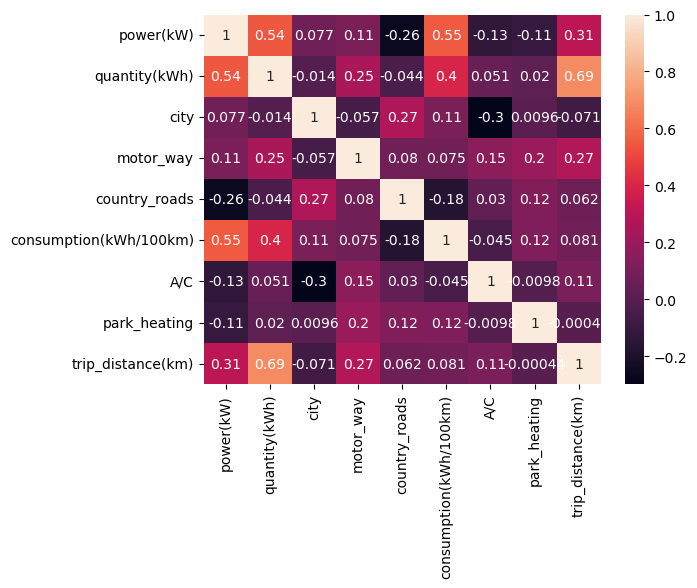

In [73]:
numerical_features= selcted_df.drop(columns=['driving_style','tire_type','month','weekday','day'],axis=1)
corr = numerical_features.corr()
sns.heatmap(corr, annot = True)

### Correlation between target and catgorical features

In [58]:
data=selcted_df[['trip_distance(km)','driving_style']]
data['trip_distance(km)']=data['trip_distance(km)'].astype(float)
data.head()

/tmp/ipykernel_342217/787538836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip_distance(km)']=data['trip_distance(km)'].astype(float)


,trip_distance(km),driving_style
13,59.0,Normal
14,59.0,Normal
15,49.0,Normal
16,71.0,Normal
17,59.0,Normal


In [26]:
quartile_1 = np.round(data['trip_distance(km)'].quantile(0.25), 2)
quartile_3 = np.round(data['trip_distance(km)'].quantile(0.75), 2)

In [27]:
# Interquartile range
iqr = np.round(quartile_3 - quartile_1, 2)

<AxesSubplot:title={'center':'trip_distance(km)'}, xlabel='driving_style'>

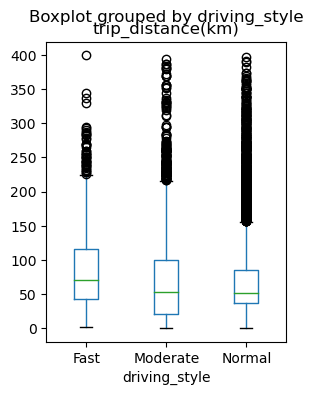

In [28]:
data.boxplot(column='trip_distance(km)', by='driving_style',figsize=(3,4), grid=False,  fontsize=10)

<AxesSubplot:title={'center':'trip_distance(km)'}, xlabel='tire_type'>

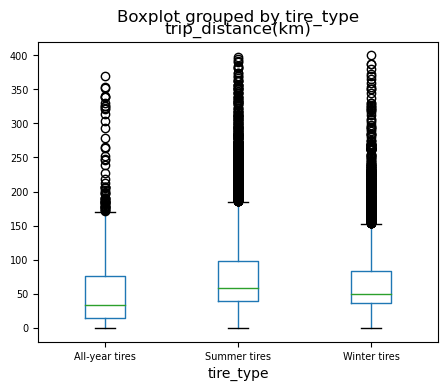

In [29]:
selcted_df.boxplot(column='trip_distance(km)', by='tire_type',figsize=(5,4), grid=False,  fontsize=7)

<AxesSubplot:title={'center':'trip_distance(km)'}, xlabel='weekday'>

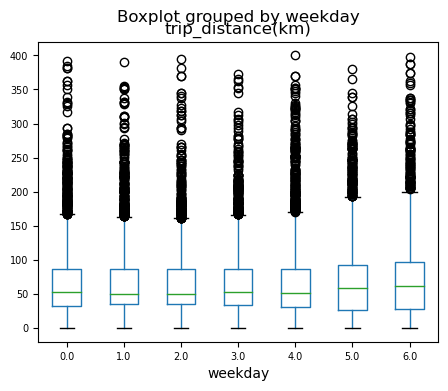

In [30]:
selcted_df.boxplot(column='trip_distance(km)', by='weekday',figsize=(5,4), grid=False,  fontsize=7)

<AxesSubplot:title={'center':'trip_distance(km)'}, xlabel='month'>

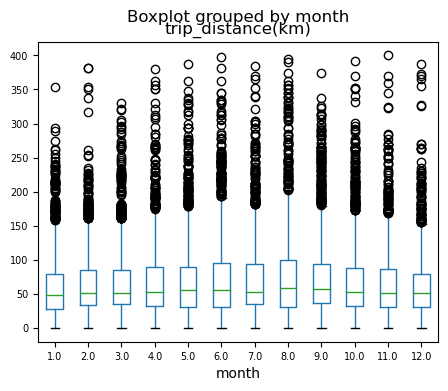

In [31]:
selcted_df.boxplot(column='trip_distance(km)', by='month',figsize=(5,4), grid=False,  fontsize=7)

<AxesSubplot:title={'center':'trip_distance(km)'}, xlabel='day'>

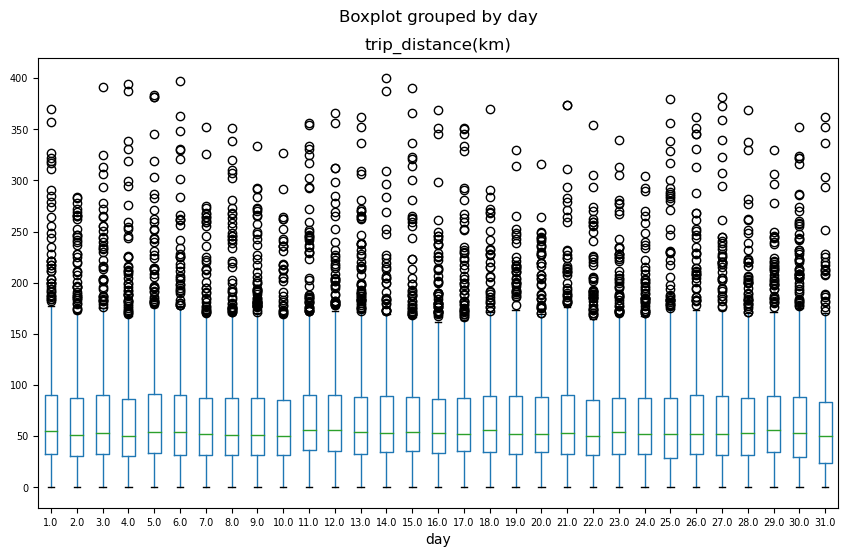

In [32]:
selcted_df.boxplot(column='trip_distance(km)', by='day',figsize=(10,6), grid=False,  fontsize=7)

## Split Train and test 

In [74]:
X=selcted_df.drop(columns='trip_distance(km)',axis=1)


In [75]:
y=pd.DataFrame(selcted_df['trip_distance(km)'])

In [ ]:
y.head()

,trip_distance(km)
13,59.0
14,59.0
15,49.0
16,71.0
17,59.0


In [ ]:
y.head()

,trip_distance(km)
13,NaN
14,59.0
15,54.0
16,60.0
17,65.0


In [ ]:
X.shape

(31628, 13)

In [ ]:
y.shape

(31628, 1)

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,shuffle=True)

In [ ]:
X_train.shape

(18976, 13)

In [ ]:
X_test.shape

(12652, 13)

## Preprocessing

In [77]:

le=LabelEncoder()
ohe=OneHotEncoder(drop='first')

In [78]:
X_train_dumm=pd.get_dummies(X_train, prefix=['tire_type', 'driving_style'], columns=['tire_type', 'driving_style'])
X_test_dumm=pd.get_dummies(X_test, prefix=['tire_type', 'driving_style'], columns=['tire_type', 'driving_style'])

In [79]:
X_train_dumm.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,month,weekday,day,tire_type_All-year tires,tire_type_Summer tires,tire_type_Winter tires,driving_style_Fast,driving_style_Moderate,driving_style_Normal
21809,111.0,5.50,1.0,1.0,0.0,11.70,0.0,0.0,7.0,1.0,21.0,0,1,0,0,0,1
31310,278.0,29.00,1.0,1.0,1.0,20.25,0.0,0.0,6.0,2.0,6.0,0,1,0,0,0,1
17968,49.0,5.86,1.0,0.0,1.0,12.21,0.0,0.0,8.0,0.0,16.0,0,1,0,0,0,1
15562,150.0,13.98,0.0,1.0,0.0,NaN,0.0,0.0,7.0,1.0,26.0,0,1,0,1,0,0
15583,150.0,14.76,1.0,0.0,1.0,16.42,1.0,0.0,6.0,6.0,19.0,0,1,0,1,0,0


In [80]:
X_train['tire_type'].value_counts()

Summer tires      9506
Winter tires      7175
All-year tires    2243
Name: tire_type, dtype: int64

In [81]:
X_train['driving_style'].value_counts()

Normal      12271
Moderate     5593
Fast         1044
Name: driving_style, dtype: int64

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18976 entries, 21809 to 5549
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               18976 non-null  float64
 1   quantity(kWh)           18976 non-null  float64
 2   tire_type               18924 non-null  object 
 3   city                    18976 non-null  float64
 4   motor_way               18976 non-null  float64
 5   country_roads           18976 non-null  float64
 6   driving_style           18908 non-null  object 
 7   consumption(kWh/100km)  18918 non-null  float64
 8   A/C                     18976 non-null  float64
 9   park_heating            18976 non-null  float64
 10  month                   18976 non-null  float64
 11  weekday                 18976 non-null  float64
 12  day                     18976 non-null  float64
dtypes: float64(11), object(2)
memory usage: 2.0+ MB


In [ ]:
X_train

In [83]:
X_train_dumm.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,month,weekday,day,tire_type_All-year tires,tire_type_Summer tires,tire_type_Winter tires,driving_style_Fast,driving_style_Moderate,driving_style_Normal
21809,111.0,5.50,1.0,1.0,0.0,11.70,0.0,0.0,7.0,1.0,21.0,0,1,0,0,0,1
31310,278.0,29.00,1.0,1.0,1.0,20.25,0.0,0.0,6.0,2.0,6.0,0,1,0,0,0,1
17968,49.0,5.86,1.0,0.0,1.0,12.21,0.0,0.0,8.0,0.0,16.0,0,1,0,0,0,1
15562,150.0,13.98,0.0,1.0,0.0,NaN,0.0,0.0,7.0,1.0,26.0,0,1,0,1,0,0
15583,150.0,14.76,1.0,0.0,1.0,16.42,1.0,0.0,6.0,6.0,19.0,0,1,0,1,0,0


# Random Forest 

In [84]:
rf=RandomForestRegressor(n_estimators=1000)

In [ ]:
X_train_dumm.isna().sum()

power(kW)                    0
quantity(kWh)                0
city                         0
motor_way                    0
country_roads                0
consumption(kWh/100km)      63
A/C                          0
park_heating                 0
month                        0
weekday                      0
day                          0
tire_type_All-year tires     0
tire_type_Summer tires       0
tire_type_Winter tires       0
driving_style_Fast           0
driving_style_Moderate       0
driving_style_Normal         0
dtype: int64

In [ ]:
X_train_dumm.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,month,weekday,day,tire_type_All-year tires,tire_type_Summer tires,tire_type_Winter tires,driving_style_Fast,driving_style_Moderate,driving_style_Normal
419,100,20.0,0,1,0,15.9,1,0,2.0,0.0,28.0,1,0,0,0,0,1
25386,35,6.4,1,1,1,15.61,0,1,4.0,1.0,27.0,0,1,0,0,0,1
18403,49,6.0,1,0,1,12.79,0,0,6.0,0.0,15.0,0,1,0,0,0,1
7821,49,2.7,0,1,1,NaN,0,0,1.0,5.0,6.0,0,0,1,0,0,1
29465,132,8.9,1,1,1,17.16,0,0,6.0,4.0,25.0,0,1,0,0,1,0


In [85]:
X_train_dumm['consumption(kWh/100km)']=X_train_dumm['consumption(kWh/100km)'].rolling(2).mean()
X_test_dumm['consumption(kWh/100km)']=X_test_dumm['consumption(kWh/100km)'].rolling(2).mean()

In [86]:
X_train_rf=X_train_dumm.copy()
X_test_rf=X_test_dumm.copy()


In [87]:
X_train_rf.reset_index(inplace=True)
X_test_rf.reset_index(inplace=True)

In [88]:
X_train_rf.drop(columns='index',axis=1,inplace=True)
X_test_rf.drop(columns='index',axis=1,inplace=True)

In [89]:
X_train_rf.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,month,weekday,day,tire_type_All-year tires,tire_type_Summer tires,tire_type_Winter tires,driving_style_Fast,driving_style_Moderate,driving_style_Normal
0,111.0,5.50,1.0,1.0,0.0,NaN,0.0,0.0,7.0,1.0,21.0,0,1,0,0,0,1
1,278.0,29.00,1.0,1.0,1.0,15.975,0.0,0.0,6.0,2.0,6.0,0,1,0,0,0,1
2,49.0,5.86,1.0,0.0,1.0,16.230,0.0,0.0,8.0,0.0,16.0,0,1,0,0,0,1
3,150.0,13.98,0.0,1.0,0.0,NaN,0.0,0.0,7.0,1.0,26.0,0,1,0,1,0,0
4,150.0,14.76,1.0,0.0,1.0,NaN,1.0,0.0,6.0,6.0,19.0,0,1,0,1,0,0


In [ ]:
X_train.head()

,power(kW),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,month,weekday,day
9098,49,9.87,1,1,0,1,2,11.07,0,0,9.0,0.0,1.0
9222,85,4.0,2,1,0,1,1,12.6,0,0,3.0,4.0,22.0
23979,88,19.8,2,0,1,1,1,11.6,1,1,12.0,2.0,15.0
7127,49,4.55,1,0,1,0,2,11.73,0,0,4.0,6.0,7.0
9925,85,3.6,1,1,1,1,1,18.0,0,0,10.0,4.0,27.0


In [90]:
X_train_rf['consumption(kWh/100km)']=X_train_rf['consumption(kWh/100km)'].fillna(X_train_rf['consumption(kWh/100km)'].mean())
X_test_rf['consumption(kWh/100km)']=X_test_rf['consumption(kWh/100km)'].fillna(X_test_rf['consumption(kWh/100km)'].mean())

In [91]:
y_train.reset_index(inplace=True)

In [92]:
y_train.drop(columns='index',axis=1,inplace=True)

In [ ]:
#X_train_rf.drop(columns=['day'],axis=1,inplace=True)

In [93]:
y_train.head()

,trip_distance(km)
0,47.0
1,141.0
2,48.0
3,67.0
4,214.0


In [94]:
y_train=pd.DataFrame(pd.to_numeric(y_train['trip_distance(km)']))

In [95]:
y_train.head()

,trip_distance(km)
0,47.0
1,141.0
2,48.0
3,67.0
4,214.0


In [96]:
X_train_rf.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,month,weekday,day,tire_type_All-year tires,tire_type_Summer tires,tire_type_Winter tires,driving_style_Fast,driving_style_Moderate,driving_style_Normal
0,111.0,5.50,1.0,1.0,0.0,16.107207,0.0,0.0,7.0,1.0,21.0,0,1,0,0,0,1
1,278.0,29.00,1.0,1.0,1.0,15.975000,0.0,0.0,6.0,2.0,6.0,0,1,0,0,0,1
2,49.0,5.86,1.0,0.0,1.0,16.230000,0.0,0.0,8.0,0.0,16.0,0,1,0,0,0,1
3,150.0,13.98,0.0,1.0,0.0,16.107207,0.0,0.0,7.0,1.0,26.0,0,1,0,1,0,0
4,150.0,14.76,1.0,0.0,1.0,16.107207,1.0,0.0,6.0,6.0,19.0,0,1,0,1,0,0


In [104]:
train_data=pd.concat([X_train_rf,y_train], axis=1)
test_data=pd.concat([X_test_rf,y_test], axis=1)

In [101]:
train_data.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,month,weekday,day,tire_type_All-year tires,tire_type_Summer tires,tire_type_Winter tires,driving_style_Fast,driving_style_Moderate,driving_style_Normal,trip_distance(km)
0,111.0,5.50,1.0,1.0,0.0,16.107207,0.0,0.0,7.0,1.0,21.0,0,1,0,0,0,1,47.0
1,278.0,29.00,1.0,1.0,1.0,15.975000,0.0,0.0,6.0,2.0,6.0,0,1,0,0,0,1,141.0
2,49.0,5.86,1.0,0.0,1.0,16.230000,0.0,0.0,8.0,0.0,16.0,0,1,0,0,0,1,48.0
3,150.0,13.98,0.0,1.0,0.0,16.107207,0.0,0.0,7.0,1.0,26.0,0,1,0,1,0,0,67.0
4,150.0,14.76,1.0,0.0,1.0,16.107207,1.0,0.0,6.0,6.0,19.0,0,1,0,1,0,0,214.0


In [103]:
test_data.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,month,weekday,day,tire_type_All-year tires,tire_type_Summer tires,tire_type_Winter tires,driving_style_Fast,driving_style_Moderate,driving_style_Normal,trip_distance(km)
0,49.0,8.35,1.0,1.0,1.0,16.001267,0.0,1.0,12.0,5.0,16.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
1,132.0,27.50,1.0,1.0,1.0,16.245000,0.0,0.0,12.0,2.0,18.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
2,111.0,2.80,1.0,0.0,0.0,15.785000,0.0,0.0,7.0,4.0,12.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
3,111.0,6.30,1.0,1.0,1.0,13.330000,0.0,0.0,7.0,2.0,12.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4,132.0,9.30,1.0,1.0,1.0,15.435000,0.0,0.0,9.0,2.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [108]:
train_data.to_csv('/home/shosamane/FedTree/FedTree/dataset/spritmonitor/train.csv')
test_data.to_csv('/home/shosamane/FedTree/FedTree/dataset/spritmonitor/test.csv')

In [97]:
model=rf.fit(X_train_rf,np.ravel(y_train))

In [48]:
y_train['trip_distance(km)'].mean()

65.89975231871833

In [49]:
y_pred=model.predict(X_train_rf)

In [107]:
sorted_idx=rf.feature_importances_.argsort()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

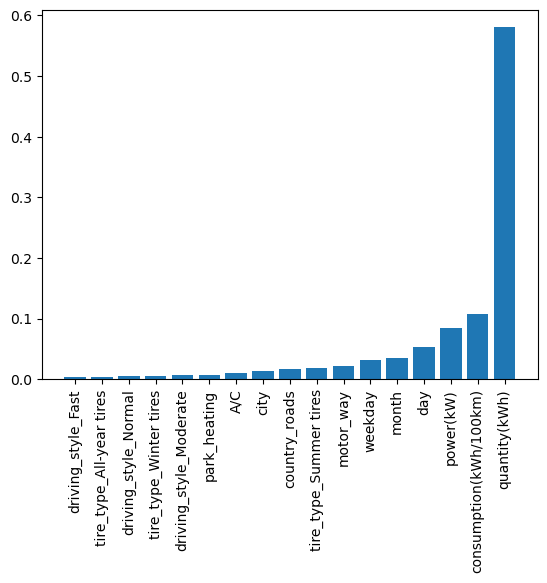

In [51]:
sorted_idx=rf.feature_importances_.argsort()
plt.bar(height=model.feature_importances_[sorted_idx],x=X_train_rf.columns[sorted_idx])
plt.xticks(rotation='vertical')

In [52]:
y_pred

array([ 64.8722,  74.2839,  18.968 , ...,  50.2521, 233.7422,  42.144 ])

In [53]:
y_pred_ser=pd.Series(y_pred)

In [54]:
y_pred_ser.shape

(18976,)

In [ ]:
for i in range(y_pred_ser.shape[0]):
    if type(y_pred_ser[i])== str:
        print('true')
    

In [55]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [56]:
y_train['trip_distance(km)']=y_train['trip_distance(km)'].astype('float')
y_test['trip_distance(km)']=y_test['trip_distance(km)'].astype('float')

In [ ]:
for i in range(y_train.shape[0]):
  if type(y_train.iloc[i])==str:
      print('true')

In [ ]:
for i in range(y_test.shape[0]):
  if type(y_test.iloc[i])==str:
      print('true')

In [ ]:
y_train_arr=np.array(y_train)
y_test_arr=np.array(y_test)

## Train Data Evaluation

In [ ]:
y_train_arr

array([[95.3],
       [32.5],
       [58.5],
       ...,
       [85.8],
       [61. ],
       [85. ]])

In [ ]:

errors = abs((y_pred - y_train_arr)/y_train_arr)


/tmp/ipykernel_279040/2841651496.py:1: RuntimeWarning: divide by zero encountered in divide
  errors = abs((y_pred - y_train_arr)/y_train_arr)


In [ ]:
rmse = float(format(np.sqrt(mean_squared_error(y_train_arr, y_pred)), '.3f'))

In [ ]:
rmse

11.213

In [ ]:
X_train_rf.columns

Index(['power(kW)', 'quantity(kWh)', 'city', 'motor_way', 'country_roads',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'month', 'weekday',
       'day', 'tire_type_All-year tires', 'tire_type_Summer tires',
       'tire_type_Winter tires', 'driving_style_Fast',
       'driving_style_Moderate', 'driving_style_Normal'],
      dtype='object')

In [ ]:
X_test_rf.columns

Index(['power(kW)', 'quantity(kWh)', 'city', 'motor_way', 'country_roads',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'day',
       'tire_type_All-year tires', 'tire_type_Summer tires',
       'tire_type_Winter tires', 'driving_style_Fast',
       'driving_style_Moderate', 'driving_style_Normal', 'weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
       'weekday_5.0', 'weekday_6.0', 'month_1.0', 'month_2.0', 'month_3.0',
       'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0'],
      dtype='object')

### Model with Important Features

In [ ]:
X_train_rf.columns

Index(['power(kW)', 'quantity(kWh)', 'city', 'motor_way', 'country_roads',
       'consumption(kWh/100km)', 'A/C', 'park_heating',
       'tire_type_All-year tires', 'tire_type_Summer tires',
       'tire_type_Winter tires', 'driving_style_Fast',
       'driving_style_Moderate', 'driving_style_Normal', 'weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
       'weekday_5.0', 'weekday_6.0', 'month_1.0', 'month_2.0', 'month_3.0',
       'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0'],
      dtype='object')

In [ ]:
X_train_rf_sel=X_train_rf.copy()

In [ ]:
X_train_rf_sel.columns

Index(['power(kW)', 'quantity(kWh)', 'city', 'motor_way', 'country_roads',
       'consumption(kWh/100km)', 'A/C', 'park_heating',
       'tire_type_All-year tires', 'tire_type_Summer tires',
       'tire_type_Winter tires', 'driving_style_Fast',
       'driving_style_Moderate', 'driving_style_Normal', 'weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
       'weekday_5.0', 'weekday_6.0', 'month_1.0', 'month_2.0', 'month_3.0',
       'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0'],
      dtype='object')

In [ ]:
# X_train_rf_sel=X_train_rf_sel[['power(kW)', 'quantity(kWh)', 'tire_type', 'motor_way',
#         'driving_style', 'consumption(kWh/100km)',  'month', 'weekday', 'day']]

In [ ]:
rf_sel=rf.fit(X_train_rf_sel,np.ravel(y_train))

In [ ]:
y_pred_sel_fet=rf_sel.predict(X_train_rf_sel)

In [ ]:
rmse_sel = float(format(np.sqrt(mean_squared_error(y_train_arr, y_pred_sel_fet)), '.3f'))
rmse_sel

11.908

In [ ]:
mae_sel=mean_squared_error(y_train_arr, y_pred_sel_fet)
rmse_sel = float(format(np.sqrt(mean_squared_error(y_train_arr, y_pred_sel_fet)), '.3f'))
rmse_sel

## Cross Validation 

In [ ]:
rf_cv=RandomForestRegressor()
skfold= StratifiedKFold(n_splits=5, shuffle=True)

In [ ]:
params_grid={
 'n_estimators': [i for i in range(1,200)],
 'bootstrap': [True, False],
 'max_depth':[ i for i in range(1,14)],
 'min_samples_leaf': [ i for i in range(1,10)],
 'min_samples_split': [ i for i in range(2,10)],
 'criterion': ['squared_error']
 }


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_cv, param_distributions = params_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train_rf,np.ravel(y_train))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, criterion=squared_error, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=6; total time=   0.3s
[CV] END bootstrap=True, criterion=squared_error, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=6; total time=   0.3s
[CV] END bootstrap=True, criterion=squared_error, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=6; total time=   0.3s
[CV] END bootstrap=True, criterion=squared_error, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=6; total time=   0.3s
[CV] END bootstrap=True, criterion=squared_error, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=6; total time=   0.3s
[CV] END bootstrap=True, criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_split=6, n_estimators=171; total time=   6.1s
[CV] END bootstrap=True, criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_s

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 148,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 13,
 'criterion': 'squared_error',
 'bootstrap': True}

In [ ]:
cv_res=pd.DataFrame(rf_random.cv_results_)

In [ ]:
cv_res[cv_res.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
54,8.62497,0.288163,0.094443,0.00194,148,4,2,13,squared_error,True,"{'n_estimators': 148, 'min_samples_split': 4, ...",0.630381,0.615135,0.59961,0.6531,0.642281,0.628101,0.019032,1


## Evaluation for Test Data 

In [ ]:
X_test_rf.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,month,weekday,day,tire_type_All-year tires,tire_type_Summer tires,tire_type_Winter tires,driving_style_Fast,driving_style_Moderate,driving_style_Normal
0,80,5.4,0,0,0,16.087543,0,0,1.0,3.0,2.0,1,0,0,0,0,1
1,49,3.0,1,0,1,15.040000,0,0,3.0,4.0,29.0,0,0,1,0,0,1
2,88,11.9,0,0,0,14.410000,0,0,4.0,0.0,22.0,1,0,0,0,0,1
3,85,1.4,1,1,1,11.570000,0,0,9.0,0.0,4.0,0,1,0,0,1,0
4,111,6.4,1,1,0,13.235000,0,0,10.0,3.0,22.0,0,1,0,0,1,0


In [57]:
columns=[col for col in X_train_rf.columns if col not in X_test_rf.columns]

In [ ]:
X_test_rf.columns

Index(['power(kW)', 'quantity(kWh)', 'city', 'motor_way', 'country_roads',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'month', 'weekday',
       'day', 'tire_type_All-year tires', 'tire_type_Summer tires',
       'tire_type_Winter tires', 'driving_style_Fast',
       'driving_style_Moderate', 'driving_style_Normal'],
      dtype='object')

In [ ]:
columns

[]

In [ ]:
X_test_rf.isna().sum()

power(kW)                   0
quantity(kWh)               0
city                        0
motor_way                   0
country_roads               0
consumption(kWh/100km)      0
A/C                         0
park_heating                0
tire_type_All-year tires    0
tire_type_Summer tires      0
tire_type_Winter tires      0
driving_style_Fast          0
driving_style_Moderate      0
driving_style_Normal        0
weekday_0.0                 0
weekday_1.0                 0
weekday_2.0                 0
weekday_3.0                 0
weekday_4.0                 0
weekday_5.0                 0
weekday_6.0                 0
month_1.0                   0
month_2.0                   0
month_3.0                   0
month_4.0                   0
month_5.0                   0
month_6.0                   0
month_7.0                   0
month_8.0                   0
month_9.0                   0
month_10.0                  0
month_11.0                  0
month_12.0                  0
dtype: int

In [58]:
y_pred_test=model.predict(X_test_rf)

In [59]:
y_pred_test_best=rf_random.best_estimator_.predict(X_test_rf)

NameError: name 'rf_random' is not defined

In [ ]:
y_pred_test.mean()

66.07374671988619

In [ ]:
y_pred_test_best

array([64.67572597, 46.1137582 , 52.98758126, ..., 82.87812577,
       48.0417365 , 29.94638787])

In [ ]:
# y_test['trip_distance(km)']=y_test['trip_distance(km)'].rolling(2).mean()
# y_test['trip_distance(km)'].fillna(y_test['trip_distance(km)'].mean(),inplace=True)

In [60]:
y_test_arr=np.array(y_test)

In [ ]:
rmse2 = float(format(np.sqrt(mean_squared_error(y_test_arr, y_pred_test)), '.3f'))

In [ ]:
rmse2

29.511

In [ ]:
mean_absolute=mae(y_test_arr,y_pred_test)
rmse2 = float(format(np.sqrt(mean_squared_error(y_test_arr, y_pred_test)), '.3f'))
r2_rf=r2_score(y_test_arr,y_pred_test)


In [ ]:
mean_absolute

16.35770701074929

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_rf=r2_score(y_test_arr,y_pred_test)

In [ ]:
r2_rf

0.6393666464966674

## XGBoost

In [ ]:
# check xgboost version
import xgboost as xgb

In [ ]:
X_train_rf.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,tire_type_All-year tires,tire_type_Summer tires,...,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0
0,49,9.87,1,0,1,16.027642,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,85,4.0,1,0,1,11.835000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,88,19.8,0,1,1,12.100000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,49,4.55,0,1,0,11.665000,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,85,3.6,1,1,1,14.865000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train_rf.columns

Index(['power(kW)', 'quantity(kWh)', 'city', 'motor_way', 'country_roads',
       'consumption(kWh/100km)', 'A/C', 'park_heating',
       'tire_type_All-year tires', 'tire_type_Summer tires',
       'tire_type_Winter tires', 'driving_style_Fast',
       'driving_style_Moderate', 'driving_style_Normal', 'weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
       'weekday_5.0', 'weekday_6.0', 'month_1.0', 'month_2.0', 'month_3.0',
       'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0'],
      dtype='object')

In [ ]:
X_train_rf.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,tire_type_All-year tires,tire_type_Summer tires,...,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0
0,49,9.87,1,0,1,16.027642,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,85,4.0,1,0,1,11.835000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,88,19.8,0,1,1,12.100000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,49,4.55,0,1,0,11.665000,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,85,3.6,1,1,1,14.865000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train_rf.columns

Index(['power(kW)', 'quantity(kWh)', 'city', 'motor_way', 'country_roads',
       'consumption(kWh/100km)', 'A/C', 'park_heating',
       'tire_type_All-year tires', 'tire_type_Summer tires',
       'tire_type_Winter tires', 'driving_style_Fast',
       'driving_style_Moderate', 'driving_style_Normal', 'weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
       'weekday_5.0', 'weekday_6.0', 'month_1.0', 'month_2.0', 'month_3.0',
       'month_4.0', 'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0'],
      dtype='object')

In [ ]:
X_train_rf['power(kW)']=pd.to_numeric(X_train_rf['power(kW)'])
X_train_rf['quantity(kWh)']=pd.to_numeric(X_train_rf['quantity(kWh)'])
X_train_rf['A/C']=pd.to_numeric(X_train_rf['A/C'])
X_train_rf['city']=pd.to_numeric(X_train_rf['city'])
X_train_rf['motor_way']=pd.to_numeric(X_train_rf['motor_way'])
X_train_rf['country_roads']=pd.to_numeric(X_train_rf['country_roads'])
X_train_rf['park_heating']=pd.to_numeric(X_train_rf['park_heating'])
X_train_rf['consumption(kWh/100km)']=pd.to_numeric(X_train_rf['consumption(kWh/100km)'])
X_train_rf['tire_type_All-year tires']=pd.to_numeric(X_train_rf['tire_type_All-year tires'])
X_train_rf['tire_type_Summer tires']=pd.to_numeric(X_train_rf['tire_type_Summer tires'])
X_train_rf['tire_type_Winter tires']=pd.to_numeric(X_train_rf['tire_type_Winter tires'])
X_train_rf['driving_style_Fast']=pd.to_numeric(X_train_rf['driving_style_Fast'])
X_train_rf['driving_style_Moderate']=pd.to_numeric(X_train_rf['driving_style_Moderate'])


In [ ]:
X_test_rf['power(kW)']=pd.to_numeric(X_test_rf['power(kW)'])
X_test_rf['quantity(kWh)']=pd.to_numeric(X_test_rf['quantity(kWh)'])
X_test_rf['A/C']=pd.to_numeric(X_test_rf['A/C'])
X_test_rf['city']=pd.to_numeric(X_test_rf['city'])
X_test_rf['motor_way']=pd.to_numeric(X_test_rf['motor_way'])
X_test_rf['country_roads']=pd.to_numeric(X_test_rf['country_roads'])
X_test_rf['park_heating']=pd.to_numeric(X_test_rf['park_heating'])
X_test_rf['consumption(kWh/100km)']=pd.to_numeric(X_test_rf['consumption(kWh/100km)'])
X_test_rf['tire_type_All-year tires']=pd.to_numeric(X_test_rf['tire_type_All-year tires'])
X_test_rf['tire_type_Summer tires']=pd.to_numeric(X_test_rf['tire_type_Summer tires'])
X_test_rf['tire_type_Winter tires']=pd.to_numeric(X_test_rf['tire_type_Winter tires'])
X_test_rf['driving_style_Fast']=pd.to_numeric(X_test_rf['driving_style_Fast'])
X_test_rf['driving_style_Moderate']=pd.to_numeric(X_test_rf['driving_style_Moderate'])


In [ ]:
X_train_rf.info() 
#power(kW), quantity(kWh), city, motor_way, country_roads, A/C, park_heating


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18976 entries, 419 to 20084
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   power(kW)                 18976 non-null  int64  
 1   quantity(kWh)             18976 non-null  float64
 2   city                      18976 non-null  int64  
 3   motor_way                 18976 non-null  int64  
 4   country_roads             18976 non-null  int64  
 5   consumption(kWh/100km)    18845 non-null  float64
 6   A/C                       18976 non-null  int64  
 7   park_heating              18976 non-null  int64  
 8   month                     18976 non-null  float64
 9   weekday                   18976 non-null  float64
 10  day                       18976 non-null  float64
 11  tire_type_All-year tires  18976 non-null  uint8  
 12  tire_type_Summer tires    18976 non-null  uint8  
 13  tire_type_Winter tires    18976 non-null  uint8  
 14  driv

In [ ]:
# define data_dmatrix
train_data_dmatrix = xgb.DMatrix(data=X_train_rf,label=y_train)
test_data_dmatrix = xgb.DMatrix(data=X_test_rf,label=y_test)

In [ ]:
params = {
            'objective':'reg:squarederror',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100,
            'subsample':0.8,  
            'eta':0.1,
      #      'n_parallel_tree':10,
            'alpha':0.0,
            'gamma':0.0,
            'lambda':0.01,
            'booster':'gbtree'
        }  


In [ ]:
  
# Instantiation
xgb_r = xgb.XGBRegressor(**params)

In [ ]:
# Fitting the model
xgb_r.fit(X_train_rf,np.ravel(y_train))

XGBRegressor(alpha=0.0, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', lambda=0.01,
             learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [ ]:
# X_test_rf.drop(columns='day',axis=1,inplace=True)

In [ ]:
y_test_pred_xg=xgb_r.predict(X_test_rf)

In [ ]:
type(y_test_arr)

numpy.ndarray

In [ ]:

mean_absolute=mae(y_test_arr,y_test_pred_xg)
mean_absolute

19.928749465858292

In [ ]:
r2_xgb=r2_score(y_test_arr,np.array(y_test_pred_xg))

In [ ]:
r2_xgb


0.5071406579842914

In [ ]:
y_test_arr=np.array(y_test)
mean_absolute_dect=mae(y_test_arr,y_test_pred_xg)
print("mean_absolute_nn)=",mean_absolute_dect)
rmse2_dect = float(format(np.sqrt(mean_squared_error(y_test_arr, y_test_pred_xg)), '.3f'))
print("rmse2_dect_nn", rmse2_dect)
r2_xgb=r2_score(y_test_arr,y_test_pred_xg)
print("r2_nn=", r2_xgb)

## CV for XG Boost

In [ ]:
from xgboost import cv

In [ ]:
params = {
            'objective':['reg:squarederror'],
     #       'max_depth':  [ 3, 4, 5, 6, 8, 10, 12, 15],
            'alpha': [10],
            'learning_rate':[1.0],
            'n_estimators':[300],
            'subsample':[0.8],  
            'eta':[0.1],
      #      'n_parallel_tree':10,
            'alpha':[0.0],
       #     'gamma':[ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            'lambda':[0.05,0.10,0.15,0.20,0.25,0.30],
            'booster':['gbtree','gblinear'],
        #    'min_child_weight”': [ 1, 3, 5, 7 ],
            'eval_metric': ['rmse'],
        
        }  
xgb_r = xgb.XGBRegressor()
xgb_cv = RandomizedSearchCV(estimator=xgb_r,param_distributions=params, cv=5,n_iter=100,scoring='neg_mean_squared_error')


In [ ]:
xgb_r = xgb.XGBRegressor()

In [ ]:
xgb_cv = RandomizedSearchCV(estimator=xgb_r,param_distributions=params, cv=5,n_iter=100,scoring='neg_mean_squared_error')

In [ ]:
y_train

,trip_distance(km)
0,90.1
1,66.0
2,42.0
3,9.0
4,7.0
...,...
18971,54.5
18972,17.0
18973,53.4
18974,11.0


In [ ]:
xgb_cv.fit(X_train_rf,y_train['trip_distance(km)'])

/usr/local/lib/python3.10/dist-packages/scikit_learn-1.1.2-py3.10-linux-x86_64.egg/sklearn/model_selection/_search.py:306: UserWarning:

The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.



[13:56:46] WARNING: ../src/learner.cc:627: 
Parameters: { "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:56:46] WARNING: ../src/learner.cc:627: 
Parameters: { "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:56:47] WARNING: ../src/learner.cc:627: 
Parameters: { "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but g

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100,
                   param_distributions={'alpha': [0.0],
                                        'booster': ['gbtree', 'gblinear'],
                                        'eta': [0.1], 'eval_metric': ['rmse'],
                                        'lambda': [0.05, 0.1, 0.15, 0.2, 0.25,
                                                   0.3],
                                        'learning_rate': [1.0],
                                        'n_estimators': [300],
                                        'objective': ['reg:squarederror'],
                                        'subsample': [0.8]},
                   scoring='neg_mean_squared_error')

In [ ]:

mean_absolute=mae(y_test_arr,y_test_pred_xg)
mean_absolute


19.928749465858292

In [ ]:
r2_xgb_cv=r2_score(y_test_arr,np.array(y_test_pred_xg))
r2_xgb_cv

0.5071406579842914

## Light GBM

In [ ]:
from  lightgbm import LGBMRegressor 
import lightgbm as lgb

In [ ]:
lgbm_model=LGBMRegressor(learning_rate = 0.1,
                        num_leaves = 255,
                        num_trees = 500,
                        num_threads = 16,
                        min_data_in_leaf = 0,
                        min_sum_hessian_in_leaf = 100)

In [ ]:
lgbm_model.fit(X_train_rf,np.ravel(y_train))

/home/shosamane/.local/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_threads is set=16, n_jobs=-1 will be ignored. Current value: num_threads=16
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] num_iterations is set=500, num_trees=500 will be ignored. Current value: num_iterations=500


LGBMRegressor(min_data_in_leaf=0, min_sum_hessian_in_leaf=100, num_leaves=255,
              num_threads=16, num_trees=500)

In [ ]:
lgbm_model.get_params

<bound method LGBMModel.get_params of LGBMRegressor(min_data_in_leaf=0, min_sum_hessian_in_leaf=100, num_leaves=255,
              num_threads=16, num_trees=500)>

In [ ]:
y_pred_lgbm=lgbm_model.predict(X_test_rf)

In [ ]:
rmse = float(format(np.sqrt(mean_squared_error(y_test_arr, y_pred_lgbm)), '.3f'))
rmse

30.265

In [ ]:
mse_lgbm=mean_squared_error(y_pred_lgbm,np.array(y_test))
mse_lgbm

915.9814095422729

In [ ]:
r2_score_lgbm=r2_score(y_pred_lgbm,np.array(y_test))
r2_score_lgbm

0.47565665564567916

### Hyper Parameter Tuning for Light GBM  
 Note:  recommended to use datasets larger than 10000

In [ ]:
X_train_lgb,X_valid_lgb,y_train_lgb,y_valid_lgb=train_test_split(X_train_rf,y_train,test_size=0.2,shuffle=True)
lg_train = lgb.Dataset(X_train_lgb, label=np.ravel(y_train_lgb))
lg_validation = lgb.Dataset(X_valid_lgb, label=np.ravel(y_valid_lgb))

In [ ]:
lgbm_params = {
        "objective" :[ "regression"],
        "metric" : "rmse",
        'boosting_type': 'gbdt',
        "num_leaves" : 100,
         "max_depth": 8,
         "learning_rate" : 0.01,
         'metric': ['l1','l2'],
        # "bagging_fraction" : 0.6,
        # "feature_fraction" : 0.6,
        # "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }

evals_result_lgbm={}

In [ ]:
gbm.fit(X_train_lgb, np.ravel(y_train_lgb),
        eval_set=[(X_valid_lgb, np.ravel(y_valid_lgb))],
        eval_metric='l1',
        early_stopping_rounds=100)

/home/shosamane/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 36.4076	valid_0's l2: 2399.72
[2]	valid_0's l1: 36.1737	valid_0's l2: 2371.27
[3]	valid_0's l1: 35.944	valid_0's l2: 2343.56
[4]	valid_0's l1: 35.7177	valid_0's l2: 2316.33
[5]	valid_0's l1: 35.4946	valid_0's l2: 2289.8
[6]	valid_0's l1: 35.2746	valid_0's l2: 2263.7
[7]	valid_0's l1: 35.0545	valid_0's l2: 2237.89
[8]	valid_0's l1: 34.8404	valid_0's l2: 2212.77
[9]	valid_0's l1: 34.6271	valid_0's l2: 2188.04
[10]	valid_0's l1: 34.4186	valid_0's l2: 2163.85
[11]	valid_0's l1: 34.2132	valid_0's l2: 2140.11
[12]	valid_0's l1: 34.0096	valid_0's l2: 2116.88
[13]	valid_0's l1: 33.8102	valid_0's l2: 2094.06
[14]	valid_0's l1: 33.6118	valid_0's l2: 2071.55
[15]	valid_0's l1: 33.416	valid_0's l2: 2049.7
[16]	valid_0's l1: 33.2223	valid_0's l2: 2028.03
[17]	valid_0's l1: 33.0312	valid_0's l2: 2006.95
[18]	valid_0's l1: 32.8417	valid_0's l2: 1986.08
[19]	valid_0's l1: 32.6557	valid_0's l2: 1965.88
[20]	valid_0's l1: 32.4697	valid_0's l2: 1945.76
[21]	valid_0's l1: 32.2851	valid_0

LGBMRegressor(bagging_seed=42, learning_rate=0.01, max_depth=8,
              metric=['l1', 'l2'], num_leaves=100, objective='regression',
              seed=42, verbosity=-1)

In [ ]:
import lightgbm as lgb
model_light_gbm = lgb.train(params, lg_train, 500,
                      valid_sets=[lg_validation],
                    #   early_stopping_rounds=100,
                    #   verbose_eval=150,
                      evals_result=evals_result_lgbm )

/home/shosamane/.local/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's rmse: 46.3663
[2]	valid_0's rmse: 43.8801
[3]	valid_0's rmse: 41.7009
[4]	valid_0's rmse: 39.8063
[5]	valid_0's rmse: 38.2084
[6]	valid_0's rmse: 36.8739
[7]	valid_0's rmse: 35.6923
[8]	valid_0's rmse: 34.7573
[9]	valid_0's rmse: 33.9283
[10]	valid_0's rmse: 33.2185
[11]	valid_0's rmse: 32.6058
[12]	valid_0's rmse: 32.0738
[13]	valid_0's rmse: 31.6628
[14]	valid_0's rmse: 31.3022
[15]	valid_0's rmse: 30.982
[16]	valid_0's rmse: 30.7054
[17]	valid_0's rmse: 30.4318
[18]	valid_0's rmse: 30.2345
[19]	valid_0's rmse: 30.1083
[20]	valid_0's rmse: 29.9484
[21]	valid_0's rmse: 29.845
[22]	valid_0's rmse: 29.7353
[23]	valid_0's rmse: 29.6686
[24]	valid_0's rmse: 29.5756
[25]	valid_0's rmse: 29.4733
[26]	valid_0's rmse: 29.414
[27]	valid_0's rmse: 29.3666
[28]	valid_0's rmse: 29.3168
[29]	valid_0's rmse: 29.2339
[30]	valid_0's rmse: 29.1859
[31]	valid_0's rmse: 29.1679
[32]	valid_0's rmse: 29.1575
[33]	valid_0's rmse: 29.1062
[34]	valid_0's rmse: 29.0897
[35]	valid_0's rmse: 29.08

In [ ]:
pred_test_light_gbm = np.expm1(gbm.predict(X_test_rf))

In [ ]:
pred_test_light_gbm

array([1.37237184e+23, 1.53105080e+24, 3.80169859e+23, ...,
       2.69228791e+37, 1.58019876e+21, 1.28376999e+27])

In [ ]:
mse_lgbm=mean_squared_error(pred_test_light_gbm,np.array(y_test))
mse_lgbm

9.222153315774651e+190

In [ ]:
r2_score_lgbm=r2_score(pred_test_light_gbm,np.array(y_test))
r2_score_lgbm

-0.0003020123267445385

## Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dectree=DecisionTreeRegressor()
dectree.fit(X_train_rf, np.ravel(y_train))
y_pred_test_dect

In [64]:
dectree.fit(X_train_rf, np.ravel(y_train))

DecisionTreeRegressor()

array([ 33.8,  58.5,  57. , ..., 162. , 131. , 123. ])

In [71]:
y_test_arr=np.array(y_test)

In [73]:
y_pred_test_dect=dectree.predict(X_test_rf)
y_test_arr=np.array(y_test)
mean_absolute_dect=mae(y_test_arr,y_pred_test_dect)
print("print(mean_absolute_dect)=",mean_absolute_dect)
rmse2_dect = float(format(np.sqrt(mean_squared_error(y_test_arr, y_pred_test_dect)), '.3f'))
print("rmse2_dect=", rmse2_dect)
r2_dect=r2_score(y_test_arr,y_pred_test_dect)
print("r2_dect=", r2_dect)

print(mean_absolute_dect)= 23.30972968700601
rmse2_dect= 42.558
r2_dect= 0.2692921306784475


### Parameter Tuning 

In [79]:
params={
     "criterion":["squared_error", "absolute_error"],
     "splitter":["best", "random"],
     "max_depth": [i for i in range(1,8)],
     "min_samples_split": [i for i in range(2,10)],
     "min_samples_leaf": [i for i in range(1,10)],
     "max_features": ["sqrt", "log2"] }

In [80]:
randcv=RandomizedSearchCV(estimator=dectree, param_distributions=params,n_iter=100, cv=5)

In [81]:
randcv.fit(X_train_rf, np.ravel(y_train))

/usr/local/lib/python3.10/dist-packages/scikit_learn-1.1.2-py3.10-linux-x86_64.egg/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikit_learn-1.1.2-py3.10-linux-x86_64.egg/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikit_learn-1.1.2-py3.10-linux-x86_64.egg/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikit_learn-1.1.2-py3.10-linux-x86_64.egg/sklearn/tree/_classes.py:306: FutureWarning: `max_features=

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'splitter': ['best', 'random']})

In [88]:
randcv.best_params_

{'splitter': 'best',
 'min_samples_split': 7,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 6,
 'criterion': 'squared_error'}

In [86]:
dect_rcv_results=pd.DataFrame(randcv.cv_results_)
dect_rcv_results_rank1=dect_rcv_results.query('rank_test_score==1')

In [89]:
dect_rcv_results_rank1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
72,0.033352,0.000133,0.003768,0.000033,best,7,8,auto,6,squared_error,"{'splitter': 'best', 'min_samples_split': 7, '...",0.548428,0.567735,0.575541,0.571895,0.565135,0.565747,0.009359,1


In [90]:
y_pred_test_dect_rcv=dectree.predict(X_test_rf)
y_test_arr=np.array(y_test)
mean_absolute_dect=mae(y_test_arr,y_pred_test_dect_rcv)
print("print(mean_absolute_dect)=",mean_absolute_dect)
rmse2_dect = float(format(np.sqrt(mean_squared_error(y_test_arr, y_pred_test_dect_rcv)), '.3f'))
print("rmse2_dect=", rmse2_dect)
r2_dect=r2_score(y_test_arr,y_pred_test_dect_rcv)
print("r2_dect=", r2_dect)

print(mean_absolute_dect)= 23.30972968700601
rmse2_dect= 42.558
r2_dect= 0.2692921306784475


## Neaural nets

In [3]:
import sys
print(sys.path)

['/home/shosamane/FedTree/thesis/code', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/shosamane/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/local/lib/python3.10/dist-packages/fedtree-1.0.4-py3.10.egg', '/usr/local/lib/python3.10/dist-packages/scipy-1.9.0-py3.10-linux-x86_64.egg', '/usr/local/lib/python3.10/dist-packages/scikit_learn-1.1.2-py3.10-linux-x86_64.egg', '/usr/local/lib/python3.10/dist-packages/numpy-1.23.2-py3.10-linux-x86_64.egg', '/usr/local/lib/python3.10/dist-packages/threadpoolctl-3.1.0-py3.10.egg', '/usr/local/lib/python3.10/dist-packages/joblib-1.1.0-py3.10.egg', '/usr/lib/python3/dist-packages']


In [35]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt


In [75]:
X_train_rf.head()

,power(kW),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,month,weekday,day,tire_type_All-year tires,tire_type_Summer tires,tire_type_Winter tires,driving_style_Fast,driving_style_Moderate,driving_style_Normal
0,35,18.1,1,1,1,16.046781,0,1,12.0,0.0,2.0,0,0,1,0,0,1
1,35,5.6,1,1,1,16.500000,0,0,9.0,1.0,16.0,0,1,0,0,0,1
2,111,9.3,1,1,0,15.965000,0,0,1.0,3.0,22.0,0,0,1,0,0,1
3,35,4.9,1,1,1,15.135000,0,0,7.0,4.0,24.0,0,1,0,0,0,1
4,315,38.3,1,1,0,17.615000,0,0,5.0,6.0,6.0,0,1,0,0,1,0


In [79]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
label_scaler = StandardScaler()

# Fit on Training Data
feature_scaler.fit(X_train_rf)
label_scaler.fit(np.array(y_train).reshape(-1, 1))

# Transform both training and testing data
train_features = feature_scaler.transform(X_train_rf)
test_features = feature_scaler.transform(X_test_rf)
train_labels = label_scaler.transform(np.array(y_train).reshape(-1, 1))
test_labels = label_scaler.transform(np.array(y_test).reshape(-1, 1))

In [82]:
from tensorflow.keras import layers

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [83]:
# Now let's create a Deep Neural Network to train a regression model on our data.
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [84]:
model.compile(optimizer="RMSProp",
              loss="mean_squared_error")

In [85]:
history = model.fit(epochs=100, x=train_features, y=train_labels,
          validation_data=(test_features, test_labels), verbose=0)

In [88]:
type(history)

keras.callbacks.History

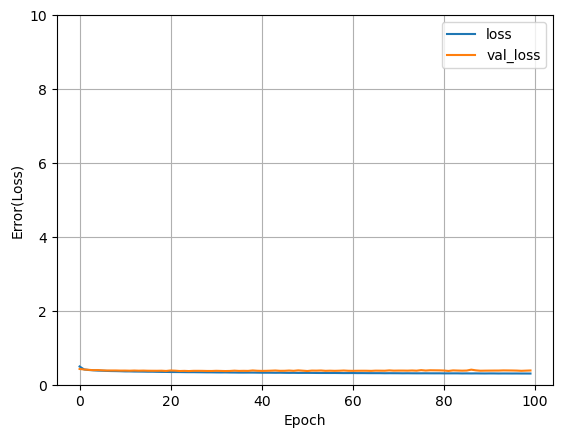

In [91]:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0,10])
plt.xlabel('Epoch')
plt.ylabel('Error(Loss)')
plt.legend()
plt.grid(True)

In [92]:
# Model evaluation on testing dataset
model.evaluate(test_features, test_labels)

396/396 [==============================] - 0s 1ms/step - loss: 0.3857


0.3856564462184906

In [93]:
results = model.predict(test_features)

396/396 [==============================] - 1s 779us/step


In [ ]:
results

In [97]:
nn_results = label_scaler.inverse_transform(results.reshape(-1,1))

In [98]:
print(nn_results)

[[32.891865]
 [53.379444]
 [62.363743]
 ...
 [68.150314]
 [48.26566 ]
 [33.87757 ]]


In [100]:

y_test_arr=np.array(y_test)
mean_absolute_dect=mae(y_test_arr,nn_results)
print("mean_absolute_nn=",mean_absolute_dect)
rmse2_dect = float(format(np.sqrt(mean_squared_error(y_test_arr, nn_results)), '.3f'))
print("rmse2_dect_nn", rmse2_dect)
r2_nn=r2_score(y_test_arr,nn_results)
print("r2_nn=", r2_dect)

mean_absolute_nn)= 18.04525457750929
rmse2_dect_nn 30.867
r2_nn= 0.6144861639809307
